<font size="5"><p style="text-align:center"><b> Проект: Информационная безопасность </b></p></font>

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#открываем файл и смотрим состав данных
data = pd.read_csv(r'C:\Users\mariya.kulikova\Desktop\Обучение\network_traffic_data.csv', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539616 entries, 0 to 539615
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             539616 non-null  int64  
 1    Flow Duration                539616 non-null  int64  
 2    Total Fwd Packets            539616 non-null  int64  
 3    Total Backward Packets       539616 non-null  int64  
 4   Total Length of Fwd Packets   539616 non-null  int64  
 5    Total Length of Bwd Packets  539616 non-null  int64  
 6    Fwd Packet Length Max        539616 non-null  int64  
 7    Fwd Packet Length Min        539616 non-null  int64  
 8    Fwd Packet Length Mean       539616 non-null  float64
 9    Fwd Packet Length Std        539616 non-null  float64
 10  Bwd Packet Length Max         539616 non-null  int64  
 11   Bwd Packet Length Min        539616 non-null  int64  
 12   Bwd Packet Length Mean       539616 non-nul

Видим, что названия столбцов не приведены к нормальной форме, сделаем это на следующем шаге.

In [3]:
data.columns = data.columns.str.lower()#приведем к строчным буквам заголовки
data.columns = data.columns.str.strip()#удалим пробелы в начале и конце заголовков
data.columns = data.columns.str.replace(' ', '_')#заменим пробелы внутри названия на нижнее подчеркивание
data.columns = data.columns.str.replace('/', '_')#заменим флеш на нижнее подчеркивание
data.columns = data.columns.str.replace('.', '_')#заменим точку на нижнее подчеркивание

In [4]:
data.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,80,5480074,3,1,12,0,6,0,4.000,3.465,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,443,711977,9,10,703,3950,267,0,78.100,103.300,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,53,153398,2,2,80,224,40,40,40.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,53,57660,1,1,46,128,46,46,46.000,0.000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,8446,767,3,1,43,6,31,6,14.336,14.440,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Будем исследовать по 20 столбцов

In [5]:
data.iloc [:, 0:20].describe()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min
count,539616.000000,5.396160e+05,539616.000000,539616.000000,5.396160e+05,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.391280e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05
mean,5563.061394,2.106693e+07,6.119972,5.985495,4.082371e+02,7.999779e+03,169.449966,11.855382,44.681011,59.525095,1675.074384,23.508936,550.037006,697.306414,inf,inf,2.134902e+06,5.264535e+06,1.731840e+07,2.945584e+05
std,14921.262751,3.812172e+07,345.109317,463.490949,7.478351e+03,1.014442e+06,560.533869,60.961661,150.873880,217.729412,2843.534429,55.198582,869.702147,1255.312166,NaN,NaN,5.824585e+06,1.055110e+07,3.395701e+07,4.269410e+06
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000e+07,-2.000000e+06,-1.200000e+01,0.000000e+00,-1.200000e+01,-1.300000e+01
25%,80.000000,7.300000e+01,1.000000,1.000000,2.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020400e+02,7.323267e-01,5.900000e+01,0.000000e+00,7.100000e+01,3.000000e+00
50%,80.000000,4.973900e+04,2.000000,2.000000,4.400000e+01,1.050000e+02,23.000000,0.000000,11.220000,0.000000,60.000000,0.000000,54.000000,0.000000,2.263827e+03,8.192189e+01,1.700058e+04,1.094470e+04,4.257200e+04,5.000000e+00
75%,443.000000,1.064030e+07,6.000000,5.000000,3.200000e+02,8.216250e+03,272.000000,6.000000,48.560000,91.700000,2796.000000,6.000000,824.500000,835.500000,1.250000e+05,2.898551e+04,1.734361e+06,3.073642e+06,8.020226e+06,5.400000e+01
max,65533.000000,1.200000e+08,200755.000000,270686.000000,2.866110e+06,5.910000e+08,24820.000000,2065.000000,5940.000000,7050.000000,17376.000000,2042.000000,5800.000000,8190.000000,inf,inf,1.200000e+08,8.470000e+07,1.200000e+08,1.200000e+08


In [6]:
#заменим значения бесконечности inf в столбцах flow_bytes_s и flow_packets_s на максимальное значение в этих столбцах
max_value_flow_bytes_s = np.nanmax(data['flow_bytes_s'][data['flow_bytes_s'] != np.inf ])
data['flow_bytes_s']. replace([np.inf , -np.inf ], max_value_flow_bytes_s, inplace= True )

max_value_flow_packets_s = np.nanmax(data['flow_packets_s'][data['flow_packets_s'] != np.inf ])
data['flow_packets_s']. replace([np.inf , -np.inf ], max_value_flow_packets_s, inplace= True )

In [7]:
#посмотрим значения Nan в двух столбцах:flow_bytes_s и flow_packets
data['flow_bytes_s'][data['flow_bytes_s'].isnull()]

3492     NaN
8289     NaN
16029    NaN
18377    NaN
21770    NaN
          ..
497741   NaN
497913   NaN
498008   NaN
498910   NaN
498919   NaN
Name: flow_bytes_s, Length: 488, dtype: float64

In [8]:
#заменим пропуски средним значением
data['flow_bytes_s'] = data['flow_bytes_s']. fillna(data['flow_bytes_s'].mean())

In [9]:
data.iloc [:, 20:40].describe()

,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length
count,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.0,539616.000000,539616.0,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,539616.000000,539616.000000
mean,2.075634e+07,4.036797e+06,6.666492e+06,1.720041e+07,1.035760e+06,9.601754e+06,2.028745e+06,2.413091e+06,6.464188e+06,8.147788e+05,0.036747,0.0,0.000056,0.0,-4.593957e+03,-4.290450e+03,7.142149e+04,7.885307e+03,9.609552,1723.695630
std,3.812106e+07,1.062759e+07,1.391409e+07,3.402154e+07,8.949951e+06,2.807218e+07,9.045625e+06,8.975673e+06,2.192197e+07,7.698887e+06,0.188139,0.0,0.007456,0.0,2.095355e+06,2.076610e+06,2.685287e+05,3.847268e+04,21.551058,2862.902929
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,-1.073741e+09,-1.073741e+09,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,4.000000e+01,2.000000e+01,5.300676e-01,6.027621e-02,0.000000,6.000000
50%,4.820000e+02,2.710000e+02,0.000000e+00,4.390000e+02,3.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.0,6.400000e+01,4.000000e+01,4.091611e+01,4.985905e+00,0.000000,71.000000
75%,8.699966e+06,2.153087e+06,2.907944e+06,7.341524e+06,4.900000e+01,1.518742e+05,3.309985e+04,5.844452e+04,1.364675e+05,4.600000e+01,0.000000,0.0,0.000000,0.0,1.640000e+02,1.360000e+02,1.470588e+04,8.695652e+03,6.000000,2896.000000
max,1.200000e+08,1.200000e+08,8.320000e+07,1.200000e+08,1.200000e+08,1.200000e+08,1.200000e+08,8.170000e+07,1.200000e+08,1.200000e+08,1.000000,0.0,1.000000,0.0,4.173072e+06,5.413720e+06,3.000000e+06,2.000000e+06,1330.000000,24820.000000


In [10]:
#удалим столбцы, в которых только нули:bwd_psh_flags, bwd_urg_flags
data = data.drop(columns = ['bwd_psh_flags', 'bwd_urg_flags'], axis = 1)

In [11]:
data.iloc [:, 38:58].describe()

,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length_1,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk
count,539616.000000,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,539616.000000,5.396160e+05,539616.0,539616.0,539616.0,539616.0
mean,276.581177,544.090932,1.112688e+06,0.062524,0.036747,0.000120,0.377765,0.365884,0.060567,0.000056,0.000120,0.643446,305.358765,44.681011,550.037006,-4.593957e+03,0.0,0.0,0.0,0.0
std,416.169617,903.656284,2.468134e+06,0.242105,0.188139,0.010975,0.484829,0.481678,0.238535,0.007456,0.010975,0.634460,457.152955,150.873880,869.702147,2.095355e+06,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.073741e+09,0.0,0.0,0.0,0.0
25%,3.334000,2.191000,4.800000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,4.000000e+01,0.0,0.0,0.0,0.0
50%,50.800000,18.860000,3.559524e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,64.500000,11.220000,54.000000,6.400000e+01,0.0,0.0,0.0,0.0
75%,484.575000,812.500000,6.598776e+05,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,523.000000,48.560000,824.500000,1.640000e+02,0.0,0.0,0.0,0.0
max,2160.000000,4732.000000,2.240000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,2508.000000,5940.000000,5800.000000,4.173072e+06,0.0,0.0,0.0,0.0


In [12]:
#удалим столбцы, в которых только нули: fwd_avg_bytes_bulk, fwd_avg_packets_bulk,fwd_avg_bulk_rate, bwd_avg_bytes_bulk
data = data.drop(columns = ['fwd_avg_bytes_bulk', 'fwd_avg_packets_bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes_bulk'], axis = 1)

In [13]:
data.iloc [:, 54:74].describe()

,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,539616.0,539616.0,539616.000000,5.396160e+05,539616.000000,5.396160e+05,539616.000000,539616.000000,539616.000000,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05,5.396160e+05
mean,0.0,0.0,6.119972,4.082371e+02,5.985495,7.998768e+03,7564.762311,1277.937053,2.946516,-2.429314e+03,1.154984e+05,4.037570e+04,1.672882e+05,8.983017e+04,1.610155e+07,9.585649e+05,1.687227e+07,1.539150e+07
std,0.0,0.0,345.109317,7.478351e+03,463.490949,1.013814e+06,13440.653528,6590.247532,267.510434,1.052329e+06,7.787530e+05,4.347032e+05,1.059626e+06,7.099710e+05,3.315463e+07,6.461275e+06,3.403851e+07,3.295695e+07
min,0.0,0.0,1.000000,0.000000e+00,0.000000,0.000000e+00,-1.000000,-1.000000,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,-1.000000,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.0,0.0,2.000000,4.400000e+01,2.000000,1.050000e+02,274.000000,0.000000,1.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.0,0.0,6.000000,3.200000e+02,5.000000,8.216250e+03,8192.000000,235.000000,2.000000,3.200000e+01,6.000000e+00,0.000000e+00,6.000000e+00,5.000000e+00,7.125041e+06,0.000000e+00,7.143036e+06,6.028677e+06
max,0.0,0.0,200755.000000,2.866110e+06,270686.000000,5.905961e+08,65535.000000,65535.000000,192491.000000,1.380000e+02,1.020000e+08,6.350000e+07,1.020000e+08,1.020000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [14]:
#удалим столбцы, в которых только нули: bwd_avg_packets_bulk, bwd_avg_bulk_rate
data = data.drop(columns = ['bwd_avg_packets_bulk', 'bwd_avg_bulk_rate'], axis = 1)

In [33]:
#видим дисбаланс классов, при разделении выборки на обучающую и тестовую, некоторых значений (например: 
#Web Attack � Sql Injection, Heartbleed),итак немного, станет еще меньше в обучающей выборке
data.label.value_counts()

label
BENIGN                        240000
DoS Hulk                      115974
PortScan                       79660
DDoS                           64366
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

Выделим признаки и целевой признак и разделим датасет на обучающую и тестовую:

In [16]:
target = data['label']
features = data.drop('label', axis=1)

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(
                                                            features, target, test_size=0.25, random_state=12345)

In [18]:
#масштабируем числовые признаки
scaler = StandardScaler()
scaler.fit(features_train.iloc [:, 0:70])

StandardScaler()

In [19]:
features_train.iloc [:, 0:70]  = scaler.transform(features_train.iloc [:, 0:70])
features_valid.iloc [:, 0:70]  = scaler.transform(features_valid.iloc [:, 0:70])
pd.options.mode.chained_assignment = None#

In [20]:
#проведем кодирование целевого признака LabelEncoder
lbl = preprocessing.LabelEncoder()
lbl.fit(target_train)

LabelEncoder()

In [21]:
target_train = lbl.transform(list(target_train))
target_valid = lbl.transform(list(target_valid))

In [22]:
#строим модель
model = DecisionTreeClassifier(random_state=12345, max_depth = 32, class_weight='balanced')
model.fit(features_train,target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=32,
                       random_state=12345)

In [23]:
#рассчитаем значение метрики accuracy_score на тестовой выборке
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)

0.9971387060428156


Так как имеется дисбаланс классов, то помимо метрики accuracy_score необходимо смотреть такие как: precision, recall,f1-score, годные для моделей с небалансированными значениями

In [24]:
#построим baseline
report = classification_report(target_valid, predicted_valid, target_names=\
                                               ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59994
           1       0.96      0.94      0.95       493
           2       1.00      1.00      1.00     16084
           3       1.00      1.00      1.00      2543
           4       1.00      1.00      1.00     29004
           5       0.99      0.99      0.99      1294
           6       0.99      0.99      0.99      1498
           7       1.00      1.00      1.00      1972
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00     20027
          11       1.00      1.00      1.00      1447
          12       0.75      0.73      0.74       378
          13       0.75      0.75      0.75         4
          14       0.42      0.46      0.44       159

    accuracy                           1.00    134904
   macro avg       0.92      0.92      0.92    134904
weighted avg       1.00   

In [25]:
#метрики в целом хорошие, плохие показатели метрик у значений с кодом 12, 13, 14:
#'Web Attack � Brute Force', 'Web Attack � Sql Injection', 'Web Attack � XSS'
lbl.classes_

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

Далее был проведен анализ важности признаков для обучения модели(согласно графику ниже). Столбцы, которые на графике показали наименьшую важность, были удалены и модель заново обучилась. Но метрики baseline получились хуже, поэтому, было принято решение не удалять признаки.

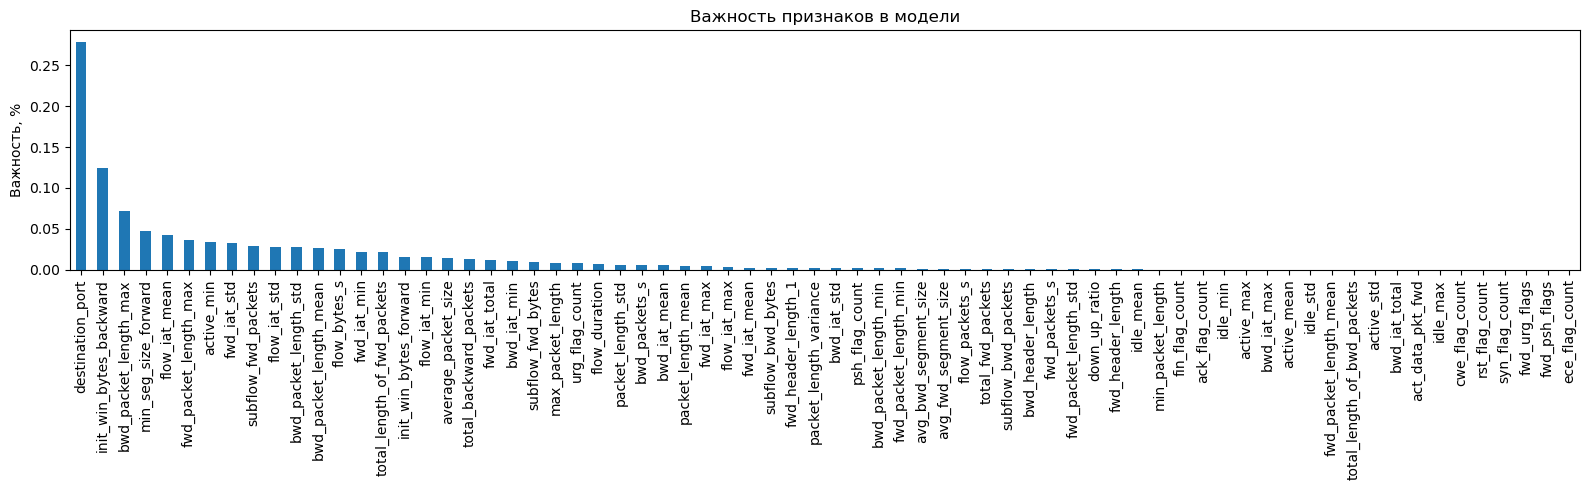

In [26]:
DTC_importances = pd.Series(model.feature_importances_,
                         features.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16,5))
DTC_importances.plot.bar(ax=ax)
ax.set_title("Важность признаков в модели")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [27]:
#сохраняем нашу модель в файле 'finalized_model.sav'
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Инструкция развертывания flask:
1. Создать файл main.py c кодом для запуска сервера
2. В Jupyter Notebook в терминале папки проекта (New->Terminal) набирать команду python main.py(название файла с Flask).
3. Проверить в Jupyter Notebook работу сервиса на коде из ячейки 31. Код выдаст запрашиваемое предсказание модели.
4. Закрыть терминал или остановить flask через терминал.
### Инструкция развертывания Doker:
1. Установить docker по ссылке с официального сайта: https://www.docker.com/products/docker-desktop/
2. Запустить docker с рабочего стола
3. Создать Dockerfail без расширения с кодом как в папке, прописать необходимые параметры.
4. Создать текстовый файл requirements.txt в папке проекта, где прописать версии всех библиотек, используемых для загрузки и развертывания модели. Посмотреть список установленных библиотек и их версии командой в терминале: list\
Если каких-то необходимых библиотек нет, то установить их через терминал, используя команду pip install ...
5. Запустить команду в папке терминала(с точкой): docker build -t default-service:v01 .
6. Запустить команду в папке терминала: docker run -it --rm -p 8989:8989 default-service:v01
7. Проверить в Jupyter Notebook работу сервиса на коде из ячейки 31. Код выдаст запрашиваемое предсказание модели.

### Ниже код только для тестирования загрузки модели:

In [28]:
#тестируем загрузку модели, чтобы далее поместить эту строку в файл main.py
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

DecisionTreeClassifier(class_weight='balanced', max_depth=32,
                       random_state=12345)


In [29]:
#тестируем предсказания модели, чтобы далее поместить этот код в файл main.py
test = features_valid.iloc[135].to_dict()#функция для выбора строки словаря
preds = loaded_model.predict(pd.DataFrame(test, index=[0]))
result = {"class": int(preds)}
print(result)

{'class': 10}


In [30]:
#Тестирование результатов запроса через сервер на данных features_valid, при закрытии сервера код выдает ошибку
import requests
import json
# Example loan application
application = features_valid.iloc[299].to_dict()
# Location of my server
url = "http://192.168.1.60:8989/predict"

# Send request
resp = requests.post(url, json=application)

# Print result
#print(resp.status_code)
print(resp.json())

{'class': 4}


In [31]:
#название, соответствующее классу
result_test = pd.Series(lbl.classes_).to_frame(name='attack')
result_test

,attack
0,BENIGN
1,Bot
2,DDoS
3,DoS GoldenEye
4,DoS Hulk
5,DoS Slowhttptest
6,DoS slowloris
7,FTP-Patator
8,Heartbleed
9,Infiltration


In [32]:
#выбираем нужное
result_test.iloc[int(preds)].to_dict()

{'attack': 'PortScan'}